# Assignment on Logistic Regression

***

# Instructions
### In this Assignment you have Share Market Dataset to train Logistic Regression Model
- This data set consist of percentage return on five previous days as Lag1 to Lag5 and today.
- This data also consist 'Volume' of Shares traded previous day and also 'Direction' of the stock for today.
- For this excercise, 'Direction' is Target/Output/dependent variable(y) and rest all are independent variables(x).
- Data set is span over 2001 to 2005.

***

# Questions
- <a href="#question1"> Question-1 (Summary and Visualization) </a>
- <a href="#question2"> Question-2 (Binary Classification-I)  </a>
- <a href="#question3"> Question-3 (Binary Classification-II) </a>

***
#### Import libraries here you need to solve this Assignment:

In [1]:
import pandas as pd  # to do data analysis
import numpy as np  # to get the numpy functions
import matplotlib.pyplot as plt  # to do ploting and visulization of data
import seaborn as sns  # to do ploting and visulization of data
from sklearn.model_selection import train_test_split  # to split the data into train and test
from scipy.optimize import minimize  # to get the scipy minimize function
from sklearn.metrics import confusion_matrix  # to get the confusion matrix
from sklearn.preprocessing import StandardScaler  # to scale the data
from statsmodels.stats.outliers_influence import variance_inflation_factor  # to get variance inflation factor of features

## Load the dataset

In [2]:
data = pd.read_csv("Smarket.csv") # reading csv data file
data.head() # printing the top 5 rows of dataframe

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


***

<a id='question1'></a>
<font color='red' size=5>Question-1 (Summary and Visualization)</font>
1. Is there any missing or duplicate row present in 'Smarket.csv' file. If yes then mention those rows and delete them.
2. Draw pairplot and heatmap between features.
3. Comment which features have significant correlation (95% significant::0.35).
4. Drop a feature if there is high correlation among two or more features.

In [3]:
# Implement your code here and add more cells if you need!

In [4]:
data.info() # to get the information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
Year         1250 non-null int64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [5]:
# to check missing values
data.isna().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

#### There is no missing values in the data set

In [6]:
# to check duplicate rows
data[data.duplicated()]

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction


#### There is no duplicate rows in the data set

In [7]:
# to get all type of values and their count in the column
data['Direction'].value_counts()

Up      648
Down    602
Name: Direction, dtype: int64

In [8]:
# to Replace the elements: ’Up’ with 1 and ‘Down‘ with 0 in column 'Direction' because we want numerical data
data['Direction']=data['Direction'].map({"Up":1,"Down":0})

In [9]:
# to get all type of values and their count in the column
data['Direction'].value_counts()

1    648
0    602
Name: Direction, dtype: int64

In [10]:
# to get all type of values and their count in the column
data['Year'].value_counts()

2005    252
2004    252
2003    252
2002    252
2001    242
Name: Year, dtype: int64

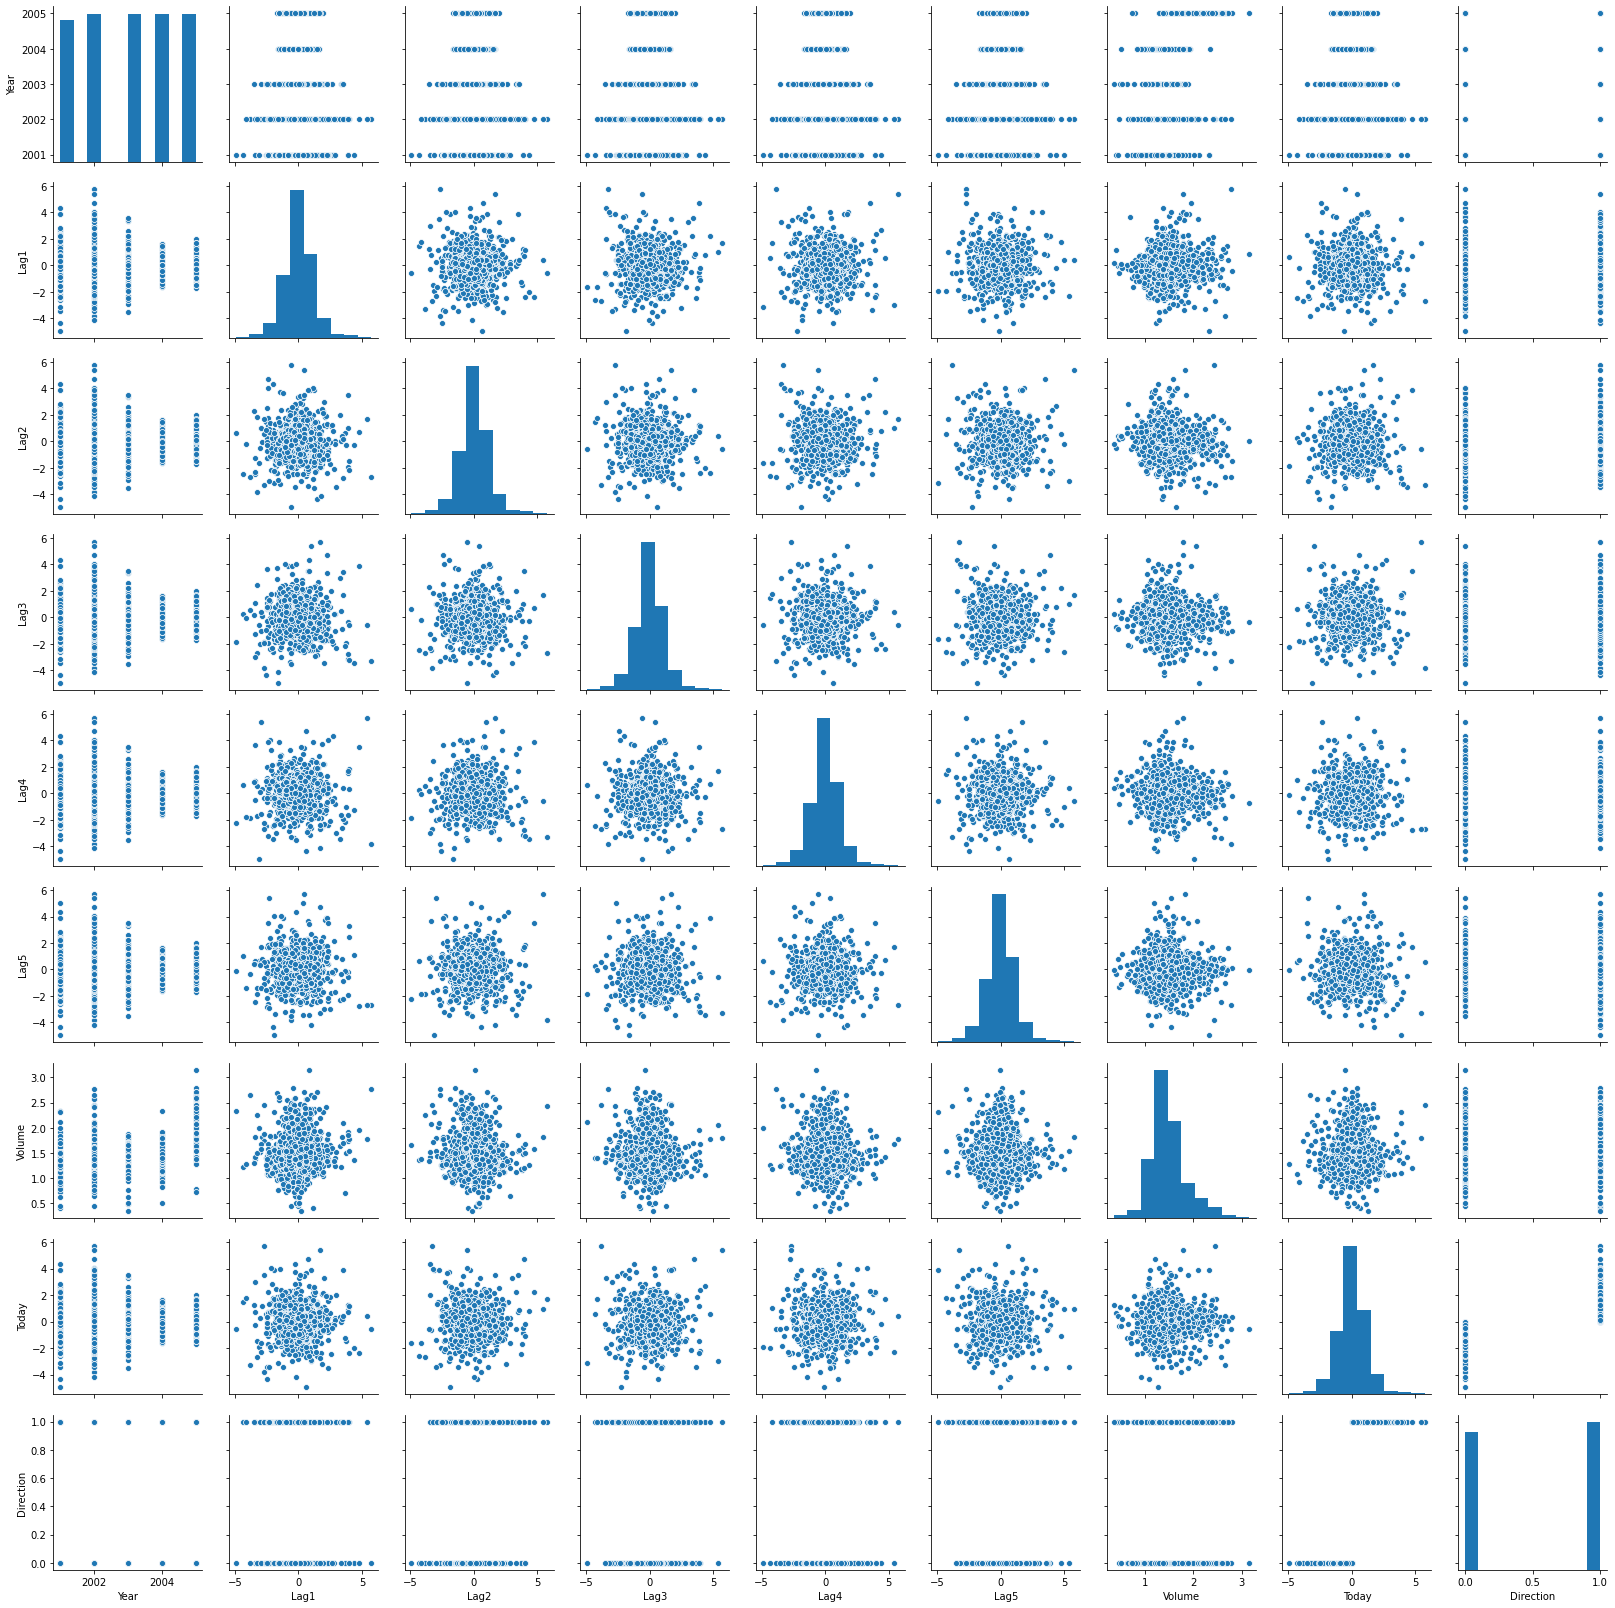

In [11]:
# to draw pairplot between features.
sns.pairplot(data)

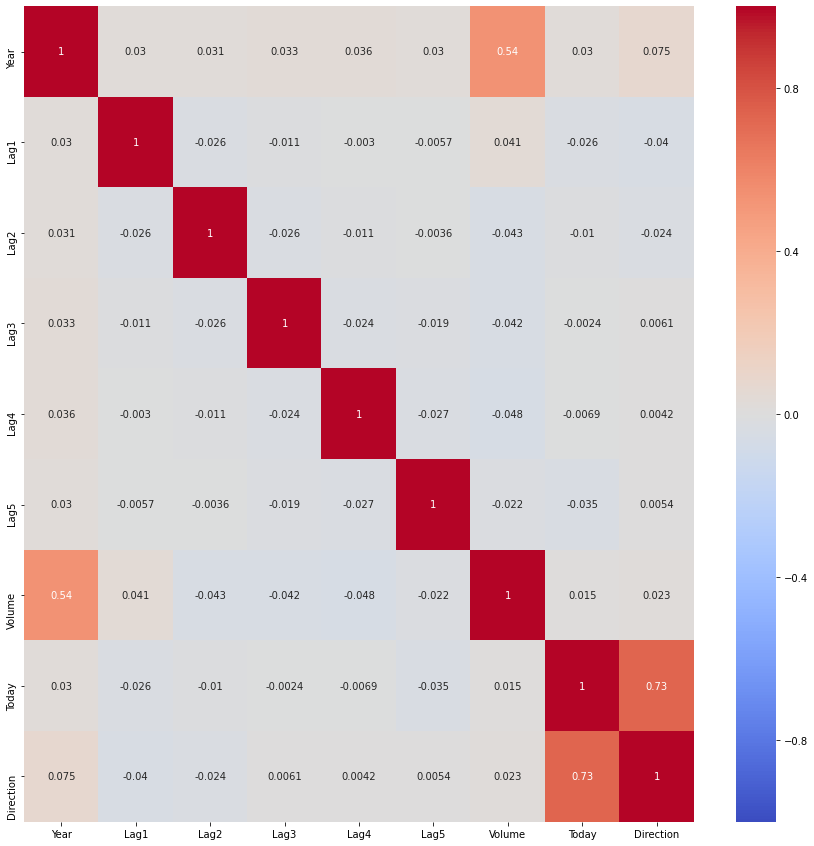

In [12]:
# to draw heatmap between features.
plt.figure(figsize=(15, 15)) 
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

#### Although we can observe that the correlation between (volume and year) and (direction and today) is good but we cannot say them as significant because one of them is continuous and other one is categorical.

In [13]:
# to check variance of the data
data.describe() 

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,0.518400
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,0.499861
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,0.000000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,0.000000
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,1.000000
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,1.000000
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000,1.000000


#### based on the observation of above table we can say that there are outliers present in the data so to treat them we are scalling the data in the below cell

In [14]:
# to scale the data
data2=data
scaler = StandardScaler()
data2[['Lag1','Lag2','Lag3','Lag4','Lag5', 'Volume','Today']] = scaler.fit_transform(data[['Lag1','Lag2','Lag3','Lag4','Lag5', 'Volume','Today']])

In [15]:
data2.describe() # to check variance of the data

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1.250000e+03,1.250000e+03,1.250000e+03,1.250000e+03,1.250000e+03,1.250000e+03,1.250000e+03,1250.000000
mean,2003.016000,-2.788880e-17,-2.353673e-17,-1.634248e-17,4.873879e-18,-5.493384e-17,2.651657e-16,-3.819167e-17,0.518400
std,1.409018,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,0.499861
min,2001.000000,-4.336716e+00,-4.336862e+00,-4.325699e+00,-4.325360e+00,-4.295744e+00,-3.115477e+00,-4.335969e+00,0.000000
25%,2002.000000,-5.663932e-01,-5.664771e-01,-5.637755e-01,-5.636702e-01,-5.628233e-01,-6.132623e-01,-5.657629e-01,0.000000
50%,2003.000000,3.095988e-02,3.088573e-02,3.231635e-02,3.238462e-02,2.867288e-02,-1.536730e-01,3.113147e-02,1.000000
75%,2004.000000,5.220043e-01,5.219382e-01,5.227633e-01,5.228011e-01,5.155566e-01,4.535373e-01,5.226009e-01,1.000000
max,2005.000000,5.043971e+00,5.043979e+00,5.035183e+00,5.034940e+00,4.992969e+00,4.647710e+00,5.044428e+00,1.000000


#### to enable the modelling of variable year whose distributions are inconsistent with the predictive logistic modelling technique we are creating the dummies in the below cell

In [16]:
data1 = pd.get_dummies(data2, columns = ['Year'])
data1.head() # printing the top 5 rows of dataframe

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005
0,0.332058,-0.172491,-2.306806,-0.928243,4.362679,-0.796765,0.841517,1,1,0,0,0,0
1,0.840930,0.331988,-0.170188,-2.306592,-0.924608,-0.504715,0.905784,1,1,0,0,0,0
2,0.905199,0.840869,0.333218,-0.170107,-2.292416,-0.186293,-0.551237,0,1,0,0,0,0
3,-0.551867,0.905140,0.841016,0.333267,-0.172270,-0.561626,0.537787,1,1,0,0,0,0
4,0.537191,-0.551950,0.905149,0.841034,0.327254,-0.756789,0.184757,1,1,0,0,0,0


In [17]:
# to reorder the data columns in the desired order 
data1=data1[['Lag1','Lag2','Lag3','Lag4','Lag5','Today','Volume','Year_2001','Year_2002','Year_2003','Year_2004','Year_2005','Direction']]
data1.head() # printing the top 5 rows of dataframe

,Lag1,Lag2,Lag3,Lag4,Lag5,Today,Volume,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Direction
0,0.332058,-0.172491,-2.306806,-0.928243,4.362679,0.841517,-0.796765,1,0,0,0,0,1
1,0.840930,0.331988,-0.170188,-2.306592,-0.924608,0.905784,-0.504715,1,0,0,0,0,1
2,0.905199,0.840869,0.333218,-0.170107,-2.292416,-0.551237,-0.186293,1,0,0,0,0,0
3,-0.551867,0.905140,0.841016,0.333267,-0.172270,0.537787,-0.561626,1,0,0,0,0,1
4,0.537191,-0.551950,0.905149,0.841034,0.327254,0.184757,-0.756789,1,0,0,0,0,1


In [18]:
# to get VIF
X = data1
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

      feature       VIF
0        Lag1  1.008748
1        Lag2  1.011091
2        Lag3  1.010372
3        Lag4  1.011690
4        Lag5  1.009155
5       Today  2.159064
6      Volume  1.743803
7   Year_2001  1.576616
8   Year_2002  1.409681
9   Year_2003  1.494630
10  Year_2004  1.526258
11  Year_2005  2.089451
12  Direction  2.170564


####  based on the observation of above table we can say that there no VIF greater than 3 and although we can observe that the correlation between (volume and year) and (direction and today) is good but we cannot say them as significant because one of them is continuous and other one is categorical. 

#### therefore we can not drop any feature.

***

<a id='question2'></a>
<font color='red' size=5> Question-2 (Binary Classification-I)</font>
#### For implementation of this question, use selected features from previous question.
1. Split data into train set and test set with test_size = 0.75
2. Fit the Logistic Regression Model between selected features and 'Direction'. Here build your own algorithms for computing Sigmoid, Cost-function and Gradient to optimize the coefficients. **[Hint: As explained in the lecture.]**
3. Interpret the models and print accuracy of trained model on test set.
4. Create a confusion matrix for this model to show how many times model predict direction of market stock correctly.

In [19]:
# Implement your code here and add more cells if you need!

In [20]:
data_arr = np.array(data1) # converting dataframe to array
print(data_arr.shape) # printing the shape of data

(1250, 13)


In [21]:
# spliting the data into the independent and dependent variables
X = np.column_stack((np.ones((len(data_arr),1)),data_arr[:,:12])) # stacking constant in the data-array
y = data_arr[:,12]
y = y.reshape(len(y),1)  # to change the shape of data

In [42]:
# spliting the data into train and test as per given condition
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.75, random_state=2)

In [23]:
X_test.shape,y_test.shape,X_train.shape,X_train.shape  # printing the shape of data

((938, 13), (938, 1), (312, 13), (312, 13))

In [24]:
# defining sigmoid function  
def sigmoid(z):
    return(1 / (1+np.exp(-z))) # this will return the value within range -1 to 1.

In [25]:
# defining cost function
def cost_fun(beta,X,y):
    m = y.size
    h = sigmoid(X.dot(beta))
    J = -1*(1/(2*m))*(np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y))
    return J

In [26]:
# defining gradient funtion
def grad_fun(beta,X,y):
    m = y.size
    h = sigmoid(X.dot(beta.reshape(-1,1)))
    grad = (1/m)*X.T.dot(h-y)
    return grad.flatten()

In [27]:
# defining funtion for calculating accuracy
def pre_and_acc(beta,X,y_actual):
    y_pred = sigmoid(X.dot(beta))
    y_pred1 = list(map(lambda a: round(a), y_pred.flatten()))
    cc = np.sum(y_pred1 == y_actual.flatten())
    acu = cc*100/y_actual.size
    return y_pred1, acu.round(2)

In [28]:
# printing the betas, cost error and gradient with given data set 
initial_beta = np.zeros(X.shape[1])
print("initial_beta", initial_beta)
print("Cost Error at initial_beta",cost_fun(initial_beta,X_train,y_train))
print("Gradient at initial_beta",grad_fun(initial_beta,X_train,y_train))
print(initial_beta.reshape(-1,1)) # to change the shape of data(beta)

initial_beta [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Cost Error at initial_beta [0.34657359]
Gradient at initial_beta [ 0.00961538  0.03179888 -0.02075119  0.01353394 -0.01146515 -0.01833883
 -0.37431296 -0.04689952 -0.01442308  0.02564103  0.01923077  0.
 -0.02083333]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [29]:
# calling the minimize function to minimize the cost error and calculating coefficient.
res = minimize(cost_fun, initial_beta,args=(X_train,y_train), method=None, jac=grad_fun, options={'maxiter':4000})
beta_trained = res.x
print(beta_trained)
beta_trained = beta_trained.reshape(len(beta_trained),1)
print(beta_trained)

[ 0.47168111 -0.72000135 -0.24555323 -0.17950267  0.31017901  0.34408718
 14.78368134  0.31771295  1.11270255 -0.48221629 -0.89808911  0.25115053
  0.48813343]
[[ 0.47168111]
 [-0.72000135]
 [-0.24555323]
 [-0.17950267]
 [ 0.31017901]
 [ 0.34408718]
 [14.78368134]
 [ 0.31771295]
 [ 1.11270255]
 [-0.48221629]
 [-0.89808911]
 [ 0.25115053]
 [ 0.48813343]]


C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\Akshat\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:429: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1 * alpha1 * derphi0) or \
C:\Users\Akshat\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:430: RuntimeWarning: invalid value encountered in greater_equal
  ((phi_a1 >= phi_a0) and (i > 1)):


In [30]:
# calculating accuracy
y_p, ac = pre_and_acc(beta_trained,X_test,y_test)
print("Accuracy",ac,"%")

Accuracy 96.38 %


##### The accuracy of our model is 96.38 % which means that our model is predicting values very well .

In [31]:
 # to get the confusion matrix
confusion_matrix(y_test, y_p)

array([[417,  26],
       [  8, 487]], dtype=int64)

***

<a id='question3'></a>
<font color='red' size=5>Question-3 (Binary Classification-II)</font>
#### Use all features from dataset 'Smarket.csv' file for this question:-
#### Dependent variable is 'Direction' and rest all are independent variables.


1. Train a Classification model by using data from 2000-2004 for training and predict market for 2005.
2. Create a confusion matrix for this model to show how many times model predict direction of market stock correctly.

In [32]:
# Implement your code here and add more cells if you need!

In [33]:
# spliting the data into train and test as per given condition
train = data1[(data1['Year_2005'] ==0)]
test = data1[(data1['Year_2005'] ==1)]

In [34]:
# converting dataframe to array
train = np.array(train)
test = np.array(test)
 # printing the shape of data
print(test.shape)
print(train.shape)

(252, 13)
(998, 13)


In [35]:
# spliting the data into the independent and dependent variables
X_train1 = np.column_stack((np.ones((len(train),1)),train[:,:12])) # stacking constant in the data-array
X_test1 = np.column_stack((np.ones((len(test),1)),test[:,:12])) # stacking constant in the data-array
y_train1 = train[:,12]
y_test1 = test[:,12]
# to change the shape of data
y_train1 =y_train1.reshape(len(y_train1),1)
y_test1 =y_test1.reshape(len(y_test1),1)
print(y_train1.shape)  # printing the shape of data

(998, 1)


In [36]:
# printing the betas, cost error and gradient with given data set 
initial_beta1 = np.zeros(X.shape[1])
print("initial_beta", initial_beta1)
print("Cost Error at initial_beta",cost_fun(initial_beta1,X_train1,y_train1))
print("Gradient at initial_beta",grad_fun(initial_beta1,X_train1,y_train1))
print(initial_beta1.reshape(-1,1)) # to change the shape of data(beta)

initial_beta [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Cost Error at initial_beta [0.34657359]
Gradient at initial_beta [-0.00801603  0.01813794  0.01437369 -0.00340922 -0.00297297  0.00111974
 -0.39992529  0.0084566   0.00400802  0.01402806 -0.01202405 -0.01402806
  0.        ]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [37]:
X_test1.shape  # printing the shape of data

(252, 13)

In [38]:
y_test1.shape  # printing the shape of data

(252, 1)

In [39]:
# calling the minimize function to minimize the cost error and calculating coefficient.
res1 = minimize(cost_fun, initial_beta1,args=(X_train1,y_train1), method=None, jac=grad_fun, options={'maxiter':4000})
beta_trained = res1.x
print(beta_trained)
beta_trained = beta_trained.reshape(len(beta_trained),1)
print(beta_trained)

[ 6.55954105e-02 -7.80565046e-02 -2.16444167e-01  6.69542107e-02
 -4.61094858e-03  1.00384551e-01  7.97256591e+00 -1.03459950e-01
 -1.60088767e-01 -3.28186210e-01  2.11926622e-01  3.41943765e-01
  0.00000000e+00]
[[ 6.55954105e-02]
 [-7.80565046e-02]
 [-2.16444167e-01]
 [ 6.69542107e-02]
 [-4.61094858e-03]
 [ 1.00384551e-01]
 [ 7.97256591e+00]
 [-1.03459950e-01]
 [-1.60088767e-01]
 [-3.28186210e-01]
 [ 2.11926622e-01]
 [ 3.41943765e-01]
 [ 0.00000000e+00]]


C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\Akshat\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:429: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1 * alpha1 * derphi0) or \
C:\Users\Akshat\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:430: RuntimeWarning: invalid value encountered in greater_equal
  ((phi_a1 >= phi_a0) and (i > 1)):


In [40]:
# calculating accuracy
y_p1, ac = pre_and_acc(beta_trained,X_test1,y_test1)
print("Accuracy",ac,"%")

Accuracy 98.02 %


##### The accuracy of our model is 98.02 % which means that our model is predicting values very well .

In [41]:
 # to get the confusion matrix
confusion_matrix(y_test1, y_p1)

array([[111,   0],
       [  5, 136]], dtype=int64)

***